In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb

# Classwork 05

YourNameHere

DateHere

## Defining Mathematical Functions

The following code shows features of numpy for rapidly implementing discrete approximations of mathematical functions.

In [42]:
def gaussian(x):
    """gaussian(x)
    
    Normalized Gaussian function, also known as a normal distribution, or a bell curve.
    """
    return (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)

def lorentzian(x):
    """lorentzian(x)
    
    Normalized Lorentzian function, also known as a Cauchy distribution, or a resonance linewidth.
    """
    return (1/np.pi)/(1 + x**2)

def sigmoid(x):
    """sigmoid(x)
    
    Sigmoid function, used to simulate neuron activation in neural networks.
    """
    return 1/(1 + np.exp(-x))

def sinc(x):
    """sinc(x)
    
    Sinc function, appears in single-slit diffraction, and is Fourier transform of a tophat function.
    """
    # Avoids division by zero by defaulting to the value 1
    return np.divide(np.sin(x), x, out=np.ones_like(x), where=(x!=0))

def raisedcosine(x):
    """raisedcosine(x)
    
    Raised cosine distribution, has compact support but similar to bell curve.
    """
    # Efficient conditional evaluation across array
    return np.where(np.abs(x) < np.pi, (1 + np.cos(x))/(2*np.pi), 0)

Note that the python function definitions are type agnostic: the parameter `x` could be any type, and the code will run provided that the expressions inside the function are compatible with that type. This type-agnosticism of python is often called "duck typing", since if it walks like a duck, and quacks like a duck, python will think it is a duck. For the cases above, functions that rely only on array broadcasting and vectorization will have the operations will work correctly when `x` is a float, or when `x` in an array as floats. This is one of the main reasons that broadcasting and vectorization are given no special syntax in numpy.

In [43]:
[f(1.24) for f in [gaussian, lorentzian, sigmoid]]  # evaluation on a float

[0.18493728096330531, 0.125437376333461, 0.7755640142690734]

In [44]:
[f(np.linspace(-1,1,3)) for f in [gaussian, lorentzian, sigmoid]] # evaluation on an array

[array([ 0.24197072,  0.39894228,  0.24197072]),
 array([ 0.15915494,  0.31830989,  0.15915494]),
 array([ 0.26894142,  0.5       ,  0.73105858])]

The remaining two functions use features specific to numpy arrays, so will autoconvert a float input to an array output.

In [45]:
[f(1.24) for f in [sinc, raisedcosine]] # numpy specialized evaluation on a float

[array(0.7627290318141443), array(0.2108478772582078)]

Make sure you understand the concepts of broadcasting and vectorization for arrays. Explain those concepts in your own words below, and use code examples to illustrate your descriptions.

In [46]:
# Broadcasting explanation and example:
"""Broadcasting is the term used to describe how numpy deals with vectors of different shapes.  For example, we could take an array and multiply it by a scalar and each value in the array will be multiplied by the scalar.  This is demonstrated below."""
x = np.array([1,2,3])
k = 2
print("Broadcast Example Results:", x*k)

# Vectorization explanation and example
"""Vectorization is the use of array functions instead of using loop methods.  For example we could add the elements in two lists together using a for loop or we could turn the lists into arrays and instead add the arrays together, eliminating the need for a loop.  Below I will demonstrate that the two approaches work the same way.  It is better to use arrays because they are faster."""

list1 = [1,2,3]
list2 = [4,5,6]
for i in range(len(list1)):
    list2[i] += list1[i]
print("List:", list2)

array1 = np.array([1,2,3])
array2 = np.array([4,5,6])
array12 = array1 + array2
print("Array:", array12)

Broadcast Example Results: [2 4 6]
List: [5, 7, 9]
Array: [5 7 9]


## Plotting Functions

### Lazy Plotting with Dataframes

For quick plots, it is convenient to neatly package all function range data together with their common domain data. Pandas dataframes are ideally suited for such data organization. Dataframes also provide a simple plot interface to quickly generate plots.

In [47]:
def make_plots(a=-10,b=10,n=1000):
    # Generate n domain points equally spaced to cover the interval [a,b]
    x = np.linspace(a,b,n)
    
    # Collect function range points corresponding to domain points
    fs = pd.DataFrame({"x":x
                     ,"gaussian":gaussian(x)
                     ,"lorentzian":lorentzian(x)
                     ,"sigmoid":sigmoid(x)
                     ,"sinc":sinc(x)
                     ,"raisedcosine":raisedcosine(x)
                     })
    
    # Plot all range points with respect to same domain points x
    fs.plot(x='x')

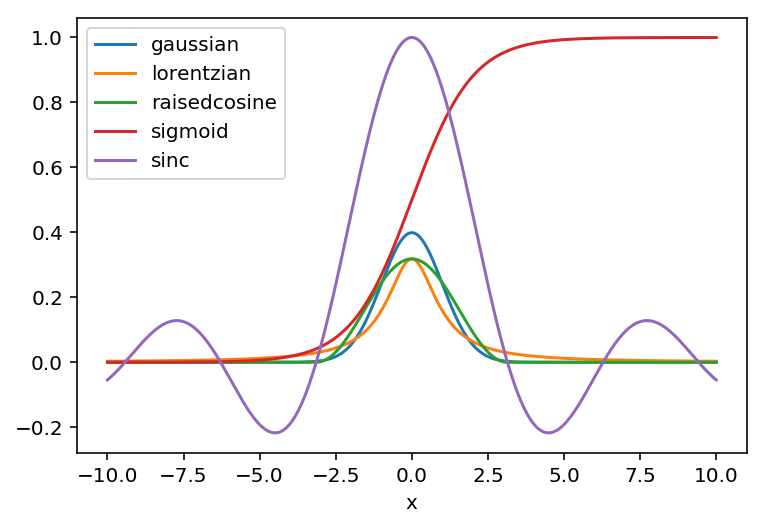

In [48]:
make_plots()

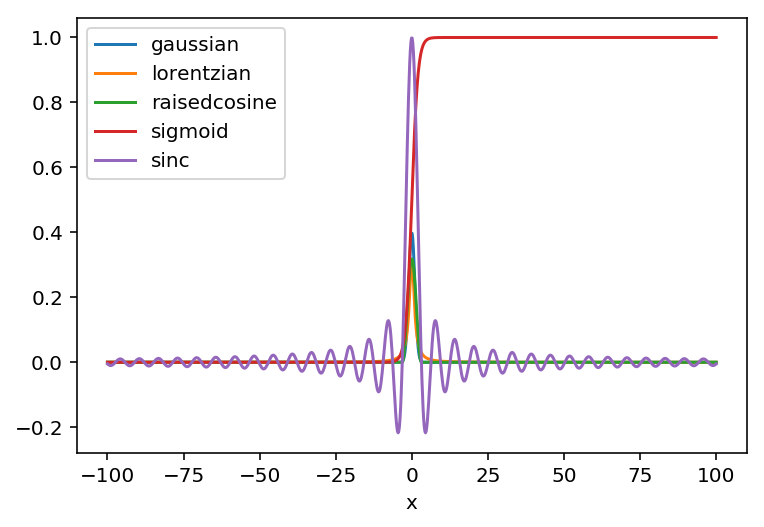

In [49]:
make_plots(a=-100,b=100)

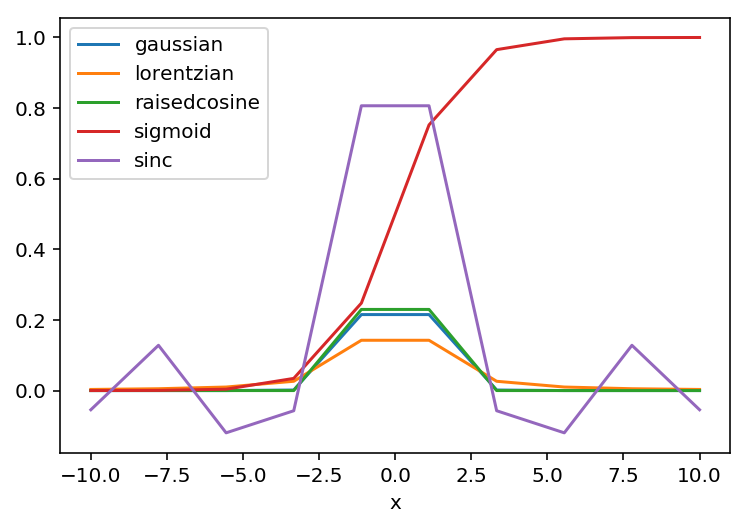

In [50]:
make_plots(n=10)

## Plotting with Matplotlib

Use `matplotlib.pyplot` to generate a plot comparing the Gaussian function, Lorentzian function, and raised cosine function in more detail. Plot the Gaussian in blue, the Lorentzian in red, and the raised cosine in green. Make the Gaussian solid, the Lorentzian dashed, and the raised cosine dotted. Create a legend that labels each curve. Resize the tickmarks to be double the default size. Label the x axis as "x" and double the default font size. Create a plot title of "Distribution comparison". Annotate the plot with a point on each curve at $x=\pi$, with an arrow pointing to one of the points with a label of $\pi$.

After you handle the 1d case, create separate 2d plots of each function by interpreting the "x" value of each function as the radius away from the origin in a 2d plane (so that each 2d function is symmetric under rotations around the origin in the plane).

The following resources may be helpful:
  - https://www.labri.fr/perso/nrougier/teaching/matplotlib/
  - http://matplotlib.org/gallery.html

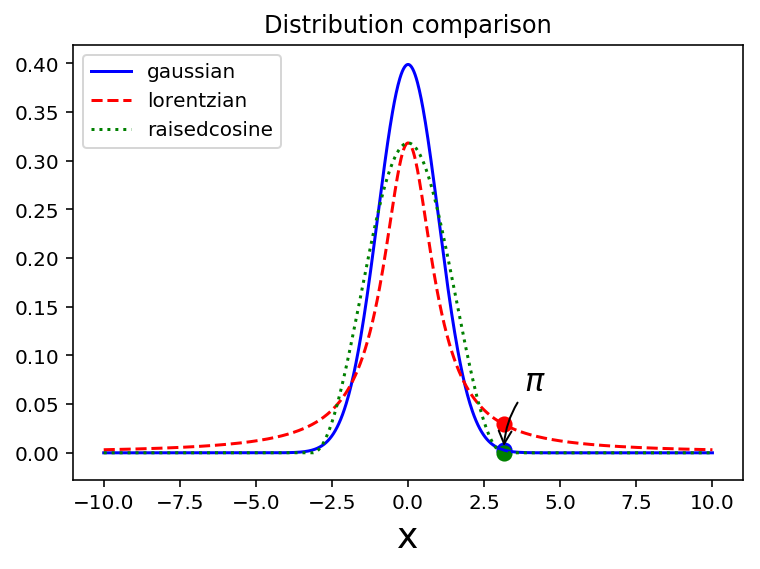

In [51]:
# Plot code goes here
def make_new_plots(a=-10,b=10,n=1000):
    font = {"size":18}
    plt.title("Distribution comparison")
    plt.xlabel("x", fontdict = font )
    # Generate n domain points equally spaced to cover the interval [a,b]
    x = np.linspace(a,b,n)
    g,l,rc = gaussian(x), lorentzian(x), raisedcosine(x)
    #Plot the three functions with appropriate labels for legend
    plt.plot(x, g, color = "blue", label = "gaussian")
    plt.plot(x, l, color = "red", linestyle = "--", label = "lorentzian")
    plt.plot(x, rc, color = "green", linestyle = ":", label = "raisedcosine")
    #Include legend
    plt.legend(loc = "upper left")
    #Add markers
    t = np.pi
    plt.scatter([t,],[gaussian(t)], 50, color ='blue')
    plt.scatter([t,],[lorentzian(t)], 50, color ='red')
    plt.scatter([t,],[raisedcosine(t)], 50, color ='green')
    #Add arrow
    plt.annotate(r'$\pi$', xy = (t,gaussian(t)),xycoords='data', xytext=(+10, +30), textcoords='offset points', fontsize=16,
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
make_new_plots(n=1000)

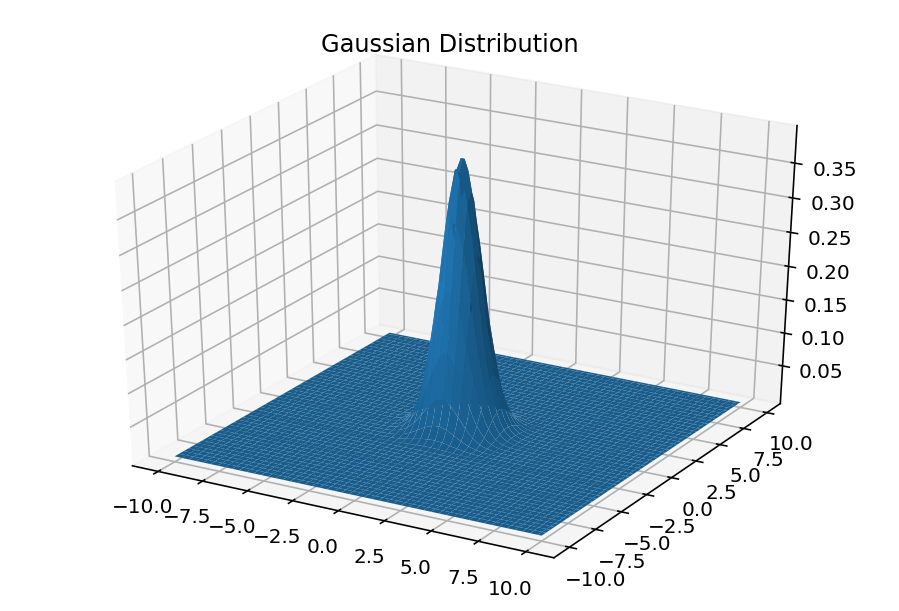

In [52]:
def gaussian_3d_plot(a = -10, b = 10, n = 1000):
    x = np.linspace(a,b,n)
    fig = plt.figure()
    ax = Axes3D(fig)
    x, y = np.meshgrid(x, x)
    r = np.sqrt(x**2+y**2)
    ax.plot_surface(x, y, gaussian(r))
    plt.title("Gaussian Distribution")

gaussian_3d_plot(n=100)


In [0]:
def lorentzian_3d_plot(a = -10, b = 10, n = 1000):
    x = np.linspace(a,b,n)
    fig = plt.figure()
    ax = Axes3D(fig)
    x, y = np.meshgrid(x, x)
    r = np.sqrt(x**2+y**2)
    ax.plot_surface(x, y, lorentzian(r))
    plt.title("Lorentzian Distribution")

lorentzian_3d_plot(n=100)

In [0]:
def raisedcosine_3d_plot(a = -10, b = 10, n = 1000):
    x = np.linspace(a,b,n)
    fig = plt.figure()
    ax = Axes3D(fig)
    x, y = np.meshgrid(x, x)
    r = np.sqrt(x**2+y**2)
    ax.plot_surface(x, y, raisedcosine(r))
    plt.title("Raised Cosine Distribution")

raisedcosine_3d_plot(n=100)

## Plotting with Seaborn

Seaborn is a statistical plotting extension to Matplotlib that uses nicer visual defaults for common data-processing tasks. Consider the following code fragment that generates a set of random points sampled from a normalized Gaussian distribution and generates a histogram of the data. The blue curve is the estimated continuous distribution function that is consistent with the sampled data. The red curve is the Gaussian function defined above. Show by increasing the parameter `n` that collecting more samples improves the estimate to converge to the actual Gaussian being used to generate the data. How many samples are required before the distribution convincingly converges?

In [0]:
def gaussian_sample(n):
    # Generate n random normally-distributed floats
    data = np.random.randn(n)
    # Create domain of points for plotting
    x = np.linspace(-4,4,100)
    # Plot
    plt.figure(1)
    plt.title("Gaussian sampling")
    plt.xlabel("x")
    plt.plot(x,gaussian(x),label="gaussian",color="red")
    # Use seaborn to generate histogram and estimate distribution
    sb.distplot(data,label="data",color="blue",kde_kws={"label":"estimate"})
    # Label curves
    plt.legend()

In [0]:
gaussian_sample(10000)
# n = 10000 gives a pretty good estimate

Repeat the above analysis for the Lorentzian distribution (see `numpy.random.standard_cauchy` for sampling Lorentzian-distributed random numbers). How many samples do you need to show convergence to the distribution? Speculate why there is a difference between the Gaussian and Lorentzian cases.

In order for the lorentzian data to converge to the distribution it must be truncated or outliers will ruin the approximation.  For the gaussian function this is not necessary.

In [0]:
# Code goes here
def lorentzian_sample(n):
    # Generate n random normally-distributed floats
    data = np.random.standard_cauchy(n)
    data = data[(data>-4) & (data<4)]
    # Create domain of points for plotting
    x = np.linspace(-4,4,100)
    # Plot
    plt.figure(1)
    plt.title("Lorentzian sampling")
    plt.xlabel("x")
    plt.plot(x,lorentzian(x),label="lorentzian",color="red")
    # Use seaborn to generate histogram and estimate distribution
    sb.distplot(data,label="data",color="blue",kde_kws={"label":"estimate"})
    # Label curves
    plt.legend()
lorentzian_sample(1000000)

Seaborn is extremely powerful for manipulating statistics and processing data points. For more examples see:
  - https://seaborn.pydata.org/examples/index.html